In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import brewer2mpl
from matplotlib import rc
import matplotlib
rc('text', usetex=True)
matplotlib.rcParams['text.usetex'] = True 
matplotlib.rcParams['text.latex.preamble'] = '\usepackage{libertine}' 
plt.style.use('bmh')
#plt.rcParams['axes.facecolor'] = 'none'
plt.rcParams['grid.alpha'] = '0.5'

In [20]:
df = pd.read_csv("../../output/output.csv", delimiter=";")

In [21]:
df.head()

,MAPPING,FUNCTION,OBJ,WIDTH,REPEATS,RMAX,GEOM_OFF?,TESS_OFF?,ALPHA,X,Y,Z,EXPECTED_RESULT,ACTUAL_RESULT,GRAPHICS_FPS,COMPUTE_FPS,Unnamed: 16
0,SPHERICAL,spherical_area,octahedron.1.0.0.0.0.0.0.obj,2048,1000,10000,0,0,3.141593,0,0,0,12.566371,12.56630,4907.42,2833.81,NaN
1,SPHERICAL,spherical_area,wide_triangle.obj,2048,1000,10000,0,0,3.141593,0,0,0,1.569383,1.04894,6124.00,2899.06,NaN
2,SPHERICAL,spherical_area,octahedron.1.0.0.0.0.0.0.obj,1024,1000,10000,0,0,3.141593,0,0,0,12.566371,12.56630,14613.30,8105.57,NaN
3,SPHERICAL,spherical_area,wide_triangle.obj,1024,1000,10000,0,0,3.141593,0,0,0,1.569383,1.04801,21720.20,8164.60,NaN
4,SPHERICAL,spherical_area,octahedron.1.0.0.0.0.0.0.obj,512,1000,10000,0,0,3.141593,0,0,0,12.566371,12.56620,41351.40,22000.70,NaN


In [22]:
df["ERROR"] = abs(df["EXPECTED_RESULT"] - df["ACTUAL_RESULT"])/df["EXPECTED_RESULT"]

In [23]:
dfo = df[df["OBJ"] == "octahedron.1.0.0.0.0.0.0.obj"]
dft = df[df["OBJ"] == "wide_triangle.obj"]

# Ratios - Triangle

# Ratios Octahedron

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


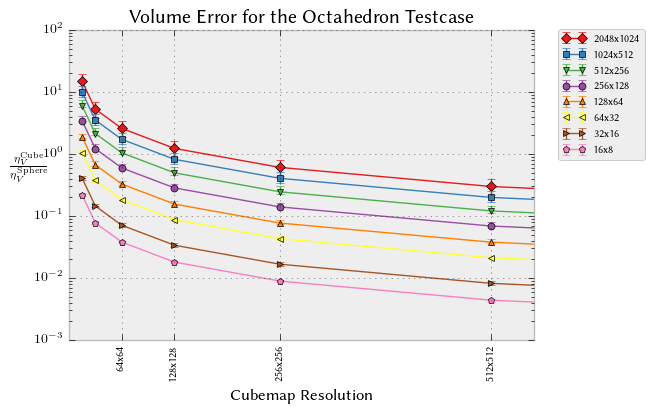

In [24]:
df_fps = dfo
df_fps = df_fps[df_fps["FUNCTION"] == "volume"]
df_fps = df_fps[df_fps["GEOM_OFF?"] != 1]
df_fps = df_fps[df_fps["TESS_OFF?"] != 1]

df_fps_cube = df_fps[df_fps["MAPPING"] == "CUBE"]
df_fps_cube.columns = [c+".C" for c in df_fps_cube.columns]
df_fps_spherical = df_fps[df_fps["MAPPING"] == "SPHERICAL"]
df_fps_spherical.columns = [c+".S" for c in df_fps_spherical.columns]

df_fps_cube["key"] = 0
df_fps_spherical["key"] = 0
df_fps_both = pd.merge(df_fps_spherical, df_fps_cube, on ="key")

df_fps_both["W"] = df_fps_both["WIDTH.C"]/df_fps_both["WIDTH.S"]
df_fps_both["ETA"] = df_fps_both["ERROR.C"]/df_fps_both["ERROR.S"]
df_fps_both["GFPS"] = df_fps_both["GRAPHICS_FPS.C"]/df_fps_both["GRAPHICS_FPS.S"]
df_fps_both["CFPS"] = df_fps_both["COMPUTE_FPS.C"]/df_fps_both["COMPUTE_FPS.S"]

f = plt.figure()
ax = f.gca()

marker_selection = ['D','s','v','o','^','<','>','p']
color_selection = brewer2mpl.get_map('Set1', 'qualitative', 8).mpl_colors

widths = df_fps_both["WIDTH.S"].unique()
markers = [marker_selection[i] for i in range(len(widths))]
colors = [color_selection[i] for i in range(len(widths))]

for width,color,marker in zip(widths,colors,markers):
    df3 = df_fps_both[df_fps_both["WIDTH.S"] == width]
    X=df3["WIDTH.C"].unique()
    Y=[]
    err_bottom=[]
    err_top=[]
    for x in X:
        yp=df3[df3["WIDTH.C"] == x]["ETA"].values
        y=np.mean(yp)
        ci_bottom=abs(y-np.percentile(yp,25))
        ci_top=abs(y-np.percentile(yp,75))
        Y.append(y)
        err_bottom.append(ci_bottom)
        err_top.append(ci_top)
    
    ax.errorbar(X, Y, color=color, yerr=[err_bottom,err_top], markersize=5, linewidth=1, marker=marker,label="{0}x{1}".format(width,width/2))

ax.set_yscale('log', basey=10)
ax.set_xticks([64,128,256,512,1024])
ax.set_xticklabels(["{0}x{0}".format(x) for x in [64,128,256,512,1024]], rotation=90,fontsize=8)
ax.set_xlim(0,564)
ax.set_title(r'Volume Error for the Octahedron Testcase')

yld = ax.set_ylabel(r"$\frac{\eta_V^\mathrm{Cube}}{\eta_V^\mathrm{Sphere}}$", rotation=0)
xld = ax.set_xlabel(r"Cubemap Resolution", rotation=0)
lgd = ax.legend(fontsize=8, bbox_to_anchor=(1.25,1.02))
f.savefig("plots/volume_error_octahedron_ratios.pdf", bbox_extra_artists=(lgd,xld,lgd), bbox_inches='tight')

# Volume - Octahedron

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2048 [  5.44619149e-01   7.93080446e-03   4.20390229e-04]
1024 [ 0.54551047  0.00775109  0.00096876]
512 [ 0.54556115  0.00779319  0.00205431]
256 [ 0.54946205  0.00709474  0.00421245]
128 [ 0.54884714  0.00814187  0.00837821]
64 [ 0.53782665  0.0126042   0.01562666]


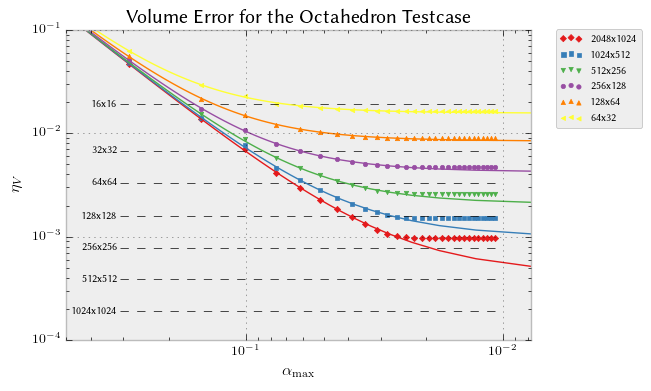

In [94]:
df2 = dfo
df2["DIFF"] = np.abs(df["ACTUAL_RESULT"] - df["EXPECTED_RESULT"])
df2 = df2[df2["MAPPING"] == "SPHERICAL"]
df2 = df2[df2["FUNCTION"] == "volume"]
df2 = df2[df2["GEOM_OFF?"] == 0]
df2 = df2[df2["TESS_OFF?"] == 0]
f = plt.figure()
ax = f.gca()

df3 = dfo
df3["DIFF"] = np.abs(df3["ACTUAL_RESULT"] - df3["EXPECTED_RESULT"])
df3 = df3[df3["MAPPING"] == "CUBE"]
df3 = df3[df3["FUNCTION"] == "volume"]
for row in df3.iterrows():
    ax.plot([min(df2["ALPHA"]), np.pi/10], [row[1]["ERROR"], row[1]["ERROR"]], color="black", linewidth=0.5,linestyle="dashed")
    ax.text(np.pi/10, row[1]["ERROR"], "{0}x{1}".format(row[1]["WIDTH"],row[1]["WIDTH"]), fontsize=8, va='center', ha='right')

marker_selection = ['D','s','v','o','^','<','>','p']
color_selection = brewer2mpl.get_map('Set1', 'qualitative', 8).mpl_colors

widths = df2["WIDTH"].unique()
markers = [marker_selection[i] for i in range(len(widths))]
colors = [color_selection[i] for i in range(len(widths))]
    
for width, color, marker in zip(widths, colors, markers):
    if width <= 32:
        continue
    df3 = df2[df2["WIDTH"] == width]
    df3 = df3[df3["ALPHA"] <= np.pi/10]
    ax.scatter(df3["ALPHA"].values, df3["ERROR"].values, color=color, marker=marker, s=10, label="{0}x{1}".format(width, width/2))
    
    rmin = df3["ALPHA"].argmin()
    mx = df3.loc[rmin]["ALPHA"]
    my = df3.loc[rmin]["ERROR"]
    #ax.text(mx, my+2.0**((np.log2(my)-3)), "{0}x{1}".format(width, width/2), fontsize=8)
    
    df4 = df3[df3["ALPHA"] > 0.025]
    X = df4["ALPHA"].values
    Y = df4["ERROR"].values
    l = np.linspace(2**-7, 2**-1, 100)
    z = np.polyfit(X, Y, 2)
    p = np.poly1d(z)
    plt.plot(l,p(l),color=color,linewidth=1)
    print width, z

ax.set_xscale('log', basex=10)
ax.set_yscale('log', basey=10)
ly = ax.set_ylabel(r"$\eta_V$")
lx = ax.set_xlabel(r"$\alpha_\mathrm{max}$")
ax.set_title(r'Volume Error for the Octahedron Testcase ')
ax.set_xlim((2**-7,2**-1))
ax.set_ylim(10**-4,10**-1)
lg = ax.legend(fontsize=8, bbox_to_anchor=(1.25,1.02))
ax.invert_xaxis()
f.savefig("plots/volume_error_octahedron.pdf", bbox_extra_artists=(lg,lx,ly), bbox_inches='tight')


# FPS - Octahedron

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


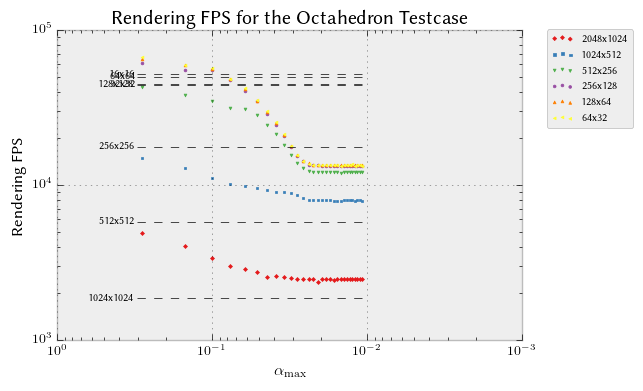

In [26]:
df2 = dfo
df2["DIFF"] = np.abs(df["ACTUAL_RESULT"] - df["EXPECTED_RESULT"])
df2 = df2[df2["MAPPING"] == "SPHERICAL"]
df2 = df2[df2["FUNCTION"] == "volume"]
df2 = df2[df2["GEOM_OFF?"] == 0]
df2 = df2[df2["TESS_OFF?"] == 0]
f = plt.figure()
ax = f.gca()

df3 = dfo
df3["DIFF"] = np.abs(df3["ACTUAL_RESULT"] - df3["EXPECTED_RESULT"])
df3 = df3[df3["MAPPING"] == "CUBE"]
df3 = df3[df3["FUNCTION"] == "volume"]
for row in df3.iterrows():
    ax.plot([min(df2["ALPHA"]), np.pi/10], [row[1]["GRAPHICS_FPS"], row[1]["GRAPHICS_FPS"]], color="black", linewidth=0.5,linestyle="dashed")
    ax.text(np.pi/10, row[1]["GRAPHICS_FPS"], "{0}x{1}".format(row[1]["WIDTH"],row[1]["WIDTH"]), fontsize=8, va='center', ha='right')
marker_selection = ['D','s','v','o','^','<','>','p']

color_selection = brewer2mpl.get_map('Set1', 'qualitative', 8).mpl_colors

widths = df2["WIDTH"].unique()
markers = [marker_selection[i] for i in range(len(widths))]
colors = [color_selection[i] for i in range(len(widths))]
    
for width, color, marker in zip(widths, colors, markers):
    if width <= 32:
        continue
    df3 = df2[df2["WIDTH"] == width]
    df3 = df3[df3["ALPHA"] <= np.pi/10]
    ax.scatter(df3["ALPHA"].values, df3["GRAPHICS_FPS"].values, color=color, marker=marker, s=4, label="{0}x{1}".format(width, width/2))
    
    rmin = df3["ALPHA"].argmin()
    mx = df3.loc[rmin]["ALPHA"]
    my = df3.loc[rmin]["GRAPHICS_FPS"]
    #ax.text(mx, my+10.0**((np.log10(my)-3)), "{0}x{1}".format(width, width/2), fontsize=8)
    
ax.set_xscale('log', basex=10)
ax.set_yscale('log', basex=10)
ly=ax.set_ylabel("Rendering FPS")
lx=ax.set_xlabel(r"$\alpha_\mathrm{max}$")
lg=ax.legend(fontsize=8, bbox_to_anchor=(1.25,1.02))
ax.set_title(r'Rendering FPS for the Octahedron Testcase')
ax.invert_xaxis()
f.savefig("plots/volume_fps_octahedron.pdf", bbox_extra_artists=(lg,lx,ly), bbox_inches='tight')

# Error Triangle

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2048 [ 0.05637893 -0.00082643]
1024 [ 0.05353769  0.00172411]
512 [ 0.05163102  0.00621953]
256 [ 0.05344087  0.01494753]
128 [ 0.03677671  0.03463153]
64 [ 0.02869518  0.05256612]


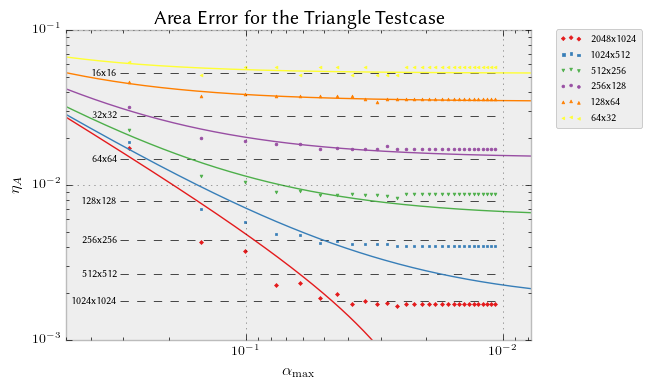

In [93]:
df2 = dft
df2["DIFF"] = np.abs(df["ACTUAL_RESULT"] - df["EXPECTED_RESULT"])
df2 = df2[df2["MAPPING"] == "SPHERICAL"]
df2 = df2[df2["FUNCTION"] == "spherical_area"]
df2 = df2[df2["GEOM_OFF?"] == 0]
df2 = df2[df2["TESS_OFF?"] == 0]
f = plt.figure()
ax = f.gca()

df3 = dft
df3["DIFF"] = np.abs(df3["ACTUAL_RESULT"] - df3["EXPECTED_RESULT"])
df3 = df3[df3["MAPPING"] == "CUBE"]
df3 = df3[df3["FUNCTION"] == "spherical_area"]
for row in df3.iterrows():
    ax.plot([min(df2["ALPHA"]), np.pi/10], [row[1]["ERROR"], row[1]["ERROR"]], color="black", linewidth=0.5,linestyle="dashed")
    ax.text(np.pi/10, row[1]["ERROR"], "{0}x{1}".format(row[1]["WIDTH"],row[1]["WIDTH"]), fontsize=8, va='center', ha='right')

marker_selection = ['D','s','v','o','^','<','>','p']
color_selection = brewer2mpl.get_map('Set1', 'qualitative', 8).mpl_colors

widths = df2["WIDTH"].unique()
markers = [marker_selection[i] for i in range(len(widths))]
colors = [color_selection[i] for i in range(len(widths))]
    
for width, color, marker in zip(widths, colors, markers):
    if width <= 32:
        continue
    df3 = df2[df2["WIDTH"] == width]
    df3 = df3[df3["ALPHA"] <= np.pi/10]
    ax.scatter(df3["ALPHA"].values, df3["ERROR"].values, color=color, marker=marker, s=4, label="{0}x{1}".format(width, width/2))
    
    rmin = df3["ALPHA"].argmin()
    mx = df3.loc[rmin]["ALPHA"]
    my = df3.loc[rmin]["ERROR"]
    #ax.text(mx, my+2.0**((np.log2(my)-3)), "{0}x{1}".format(width, width/2), fontsize=8)
    
    df4 = df3[df3["ALPHA"] > 0.025]
    X = df4["ALPHA"].values
    Y = df4["ERROR"].values
    l = np.linspace(2**-7, 2**-1, 1000)
    z = np.polyfit(X, Y, 1)
    p = np.poly1d(z)
    plt.plot(l,p(l),color=color,linewidth=1)
    print width,z

ax.set_xscale('log', basex=10)
ax.set_yscale('log', basey=10)
ly=ax.set_ylabel(r"$\eta_A$")
lx=ax.set_xlabel(r"$\alpha_\mathrm{max}$")
ax.set_title(r'Area Error for the Triangle Testcase ')
ax.set_xlim((2**-7,2**-1))
ax.set_ylim((10**-3,10**-1))
lg=ax.legend(fontsize=8, bbox_to_anchor=(1.25,1.02))
ax.invert_xaxis()
f.savefig("plots/area_error_triangle.pdf", bbox_extra_artists=(lg,lx,ly), bbox_inches='tight')



# FPS - Triangle

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


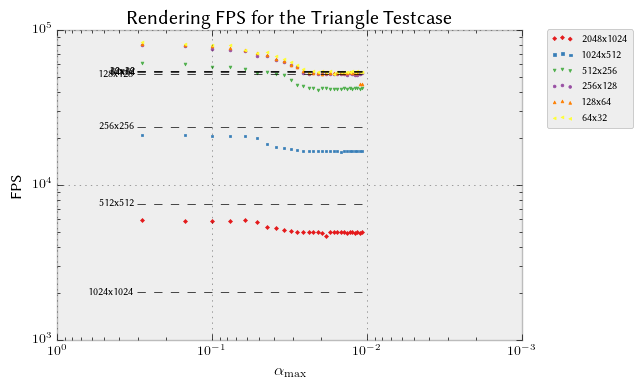

In [28]:
df2 = dft
df2["DIFF"] = np.abs(df["ACTUAL_RESULT"] - df["EXPECTED_RESULT"])
df2 = df2[df2["MAPPING"] == "SPHERICAL"]
df2 = df2[df2["FUNCTION"] == "spherical_area"]
df2 = df2[df2["GEOM_OFF?"] == 0]
df2 = df2[df2["TESS_OFF?"] == 0]
f = plt.figure()
ax = f.gca()

df3 = dft
df3["DIFF"] = np.abs(df3["ACTUAL_RESULT"] - df3["EXPECTED_RESULT"])
df3 = df3[df3["MAPPING"] == "CUBE"]
df3 = df3[df3["FUNCTION"] == "spherical_area"]
for row in df3.iterrows():
    ax.plot([min(df2["ALPHA"]), np.pi/10], [row[1]["GRAPHICS_FPS"], row[1]["GRAPHICS_FPS"]], color="black", linewidth=0.5,linestyle="dashed")
    ax.text(np.pi/10, row[1]["GRAPHICS_FPS"], "{0}x{1}".format(row[1]["WIDTH"],row[1]["WIDTH"]), fontsize=8, va='center', ha='right')

marker_selection = ['D','s','v','o','^','<','>','p']
color_selection = brewer2mpl.get_map('Set1', 'qualitative', 8).mpl_colors
widths = df2["WIDTH"].unique()
markers = [marker_selection[i] for i in range(len(widths))]
colors = [color_selection[i] for i in range(len(widths))]
    
for width, color, marker in zip(widths, colors, markers):
    if width <= 32:
        continue
    df3 = df2[df2["WIDTH"] == width]
    df3 = df3[df3["ALPHA"] <= np.pi/10]
    ax.scatter(df3["ALPHA"].values, df3["GRAPHICS_FPS"].values, color=color, marker=marker, s=4, label="{0}x{1}".format(width, width/2))

ax.set_xscale('log', basex=10)
ax.set_yscale('log', basex=10)
ly=ax.set_ylabel("FPS")
lx=ax.set_xlabel(r"$\alpha_\mathrm{max}$")
lg=ax.legend(fontsize=8, bbox_to_anchor=(1.25,1.02))
ax.set_title(r'Rendering FPS for the Triangle Testcase')
ax.invert_xaxis()
f.savefig("plots/area_fps_triangle.pdf", bbox_extra_artists=(lg,lx,ly), bbox_inches='tight')